## ACTIVIDAD 1 MODULO 3
### Construcción de un modelo de Machine Learning utilizando un algoritmo avanzado
##### Oscar Alejandro Duarte Bonilla

###### Acerca del DataSet:
###### Abandono de clientes Telco: el dataset contiene datos relevantes de los clientes para predecir el comportamiento para retener a los clientes

### *** Carga del dataset y librerias ***

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-v0_8')
%matplotlib inline
from data_exploration import explore
from feature_cleaning import missing_data as ms
from feature_cleaning import outlier as ot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [112]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### *** Exploracion de los datos ***

In [113]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [114]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [115]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen', 'tenure', 'MonthlyCharges']


In [116]:
explore.describe(data=data,output_path=r'./output/')
#hay 7043 observaciones, unicos

result saved at: ./output/describe.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [117]:
data.shape

(7043, 21)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Image saved at ./output/Countplot_Churn.png


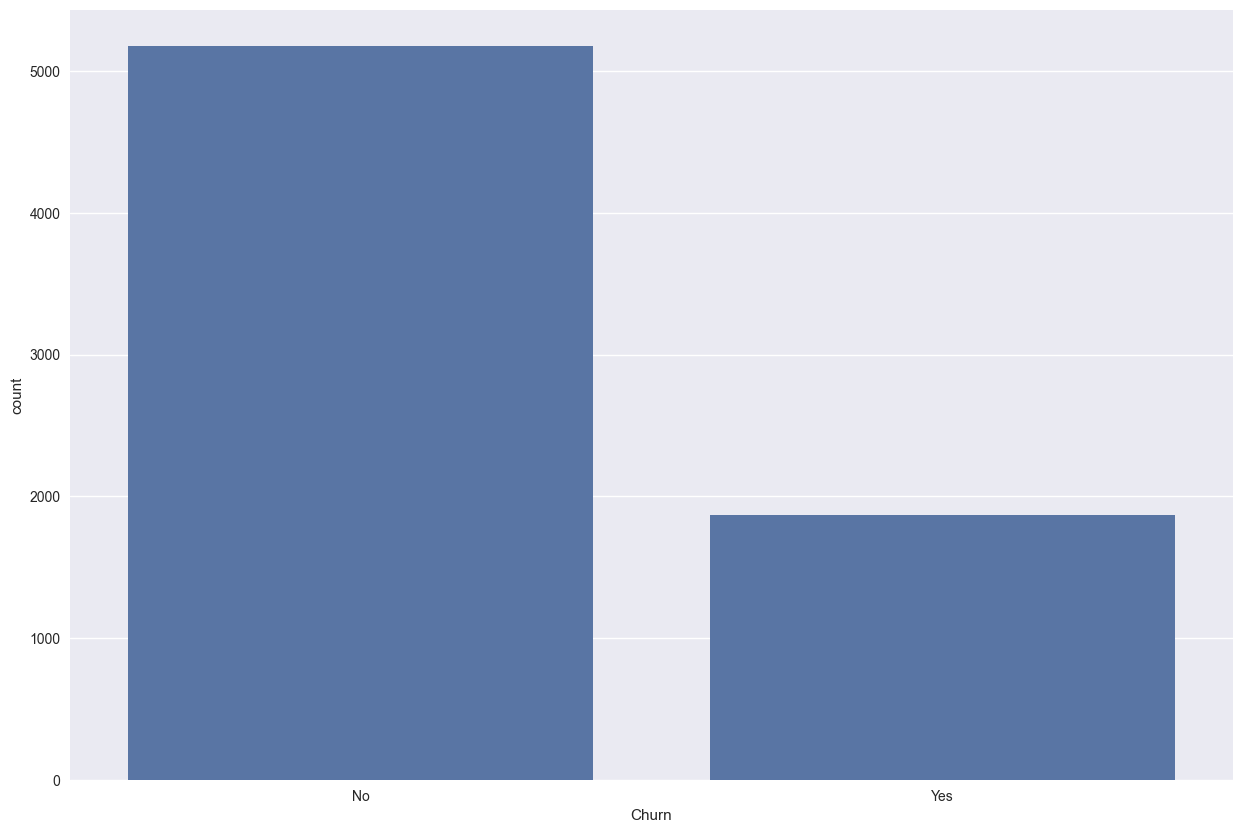

In [119]:
#Se visualiza un desbalanceo No:No abandono, Si: Si abandono
explore.discrete_var_countplot(x='Churn',data=data,output_path='./output/')

### *** Visualizacion de faltantes ***

In [120]:
#No hay valores faltantes
ms.check_missing(data=data,output_path=r'./output/')

result saved at ./output/ missing.csv


,total missing,proportion
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


### *** Limpieza ***

In [121]:
data = data.drop('customerID', axis=1)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna({'TotalCharges': data['TotalCharges'].median()}, inplace=True)

### ***Codificar y estandarizar ***

In [122]:
#Convierte las variables categoricas
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, drop_first=True)

In [123]:
#Escalamos las variables numericas y balanceamos
X = data.drop('Churn', axis=1)
y = data['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### *** Entrenamos modelo ***

##### Random Forest: tiene buena precisión y es más robusto que un solo árbol

In [125]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### *** Evaluamos modelo ***

In [126]:
y_pred = model.predict(X_test)

In [127]:
print("\n--- Resultados ---")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


--- Resultados ---
[[876 145]
 [133 916]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1021
           1       0.86      0.87      0.87      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

ROC AUC: 0.9319196772449673


#### Matriz de confusion
##### 876: Verdaderos Positivos /  145: Falsos Positivos
##### 133: Falsos Negativos     /  916: Verdaderos Negativos

#### Analisis por clases 0: No Abandonó  /  1: Si Abandonó
##### Clase 0:
###### Precision = 0.87 → Cuando el modelo predijo "0", acertó el 87% de las veces.
###### Recall = 0.86 → Capturó correctamente el 86% de los verdaderos casos clase 0.
###### F1-score = 0.86 → Balance entre precision y recall.
###### Support = 1021 → 1021 observaciones de esta clase en los datos de test

##### Clase 1:
###### Precision = 0.86
###### Recall = 0.87
###### F1-score = 0.87
###### Support = 1049

#### Esto sugiere que el modelo funciona bien con ambas clases y no está sesgado hacia ninguna.

In [128]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(2070,))

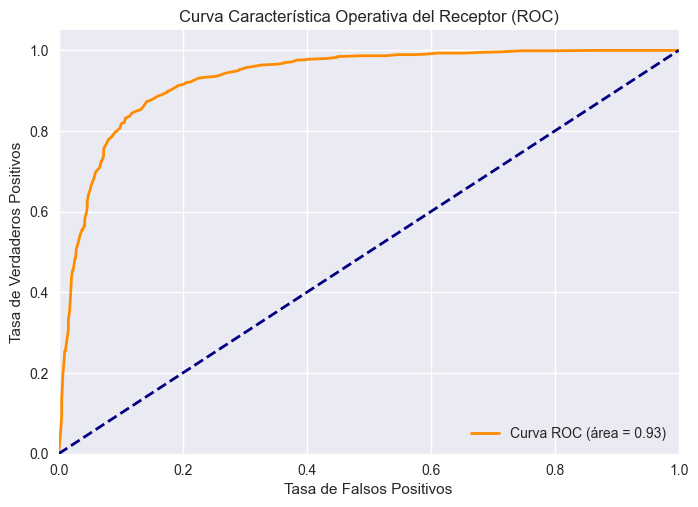

In [129]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()